In [1]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

In [2]:
from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda

Define Network

In [3]:
from networks import alex_cifar10

branchyNet = alex_cifar10.get_network()
if cuda.available:
    branchyNet.to_gpu()
branchyNet.training()

Import Data

In [4]:
from datasets import pcifar10

x_train,y_train,x_test,y_test = pcifar10.get_data()
training_size=100
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train, y_train, x_test, y_test = x_train[:training_size*5], y_train[:training_size*5], x_test[:training_size], y_test[:training_size]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 5 layers
#training size = 5000, each epoch we need to 70 seconds.
#training size = 2500, each epoch we need at least 30 seconds.
#training size = 500, each epoch we need at least 6 seconds.
#this app can use 30 cores and at least 12GB memory for UTSA server when training size is 500 .

((50000, 3, 32, 32), (50000,), (10000, 3, 32, 32), (10000,))
((500, 3, 32, 32), (500,), (100, 3, 32, 32), (100,))


Settings

In [5]:
TRAIN_BATCHSIZE = 512
TEST_BATCHSIZE = 1
TRAIN_NUM_EPOCHS = 1

Train Main Network

In [6]:
main_loss, main_acc, main_time = utils.train(branchyNet, x_train, y_train, main=True, batchsize=TRAIN_BATCHSIZE,
                                             num_epoch=TRAIN_NUM_EPOCHS)

1620855383.68


Train BranchyNet

In [7]:
#TRAIN_NUM_EPOCHS = 5
branch_loss, branch_acc, branch_time = utils.train(branchyNet, x_train, y_train, batchsize=TRAIN_BATCHSIZE,
                                             num_epoch=TRAIN_NUM_EPOCHS)

#set network to inference mode
branchyNet.testing()

1620855392.36


Visualizing Network Training

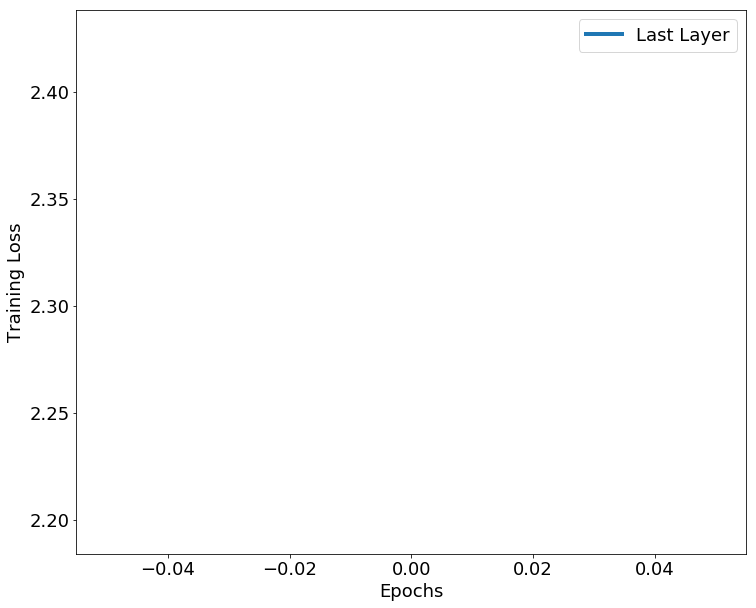

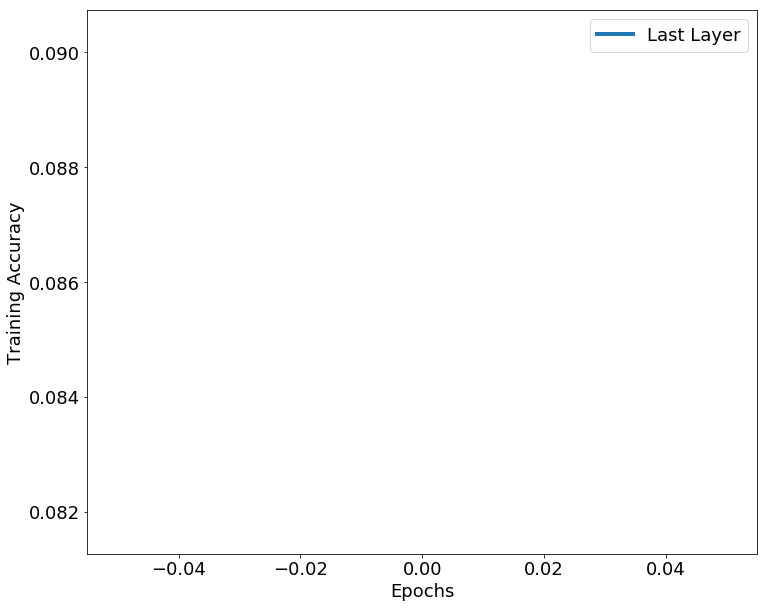

In [8]:
visualize.plot_layers(main_loss, xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(main_acc, xlabel='Epochs', ylabel='Training Accuracy')

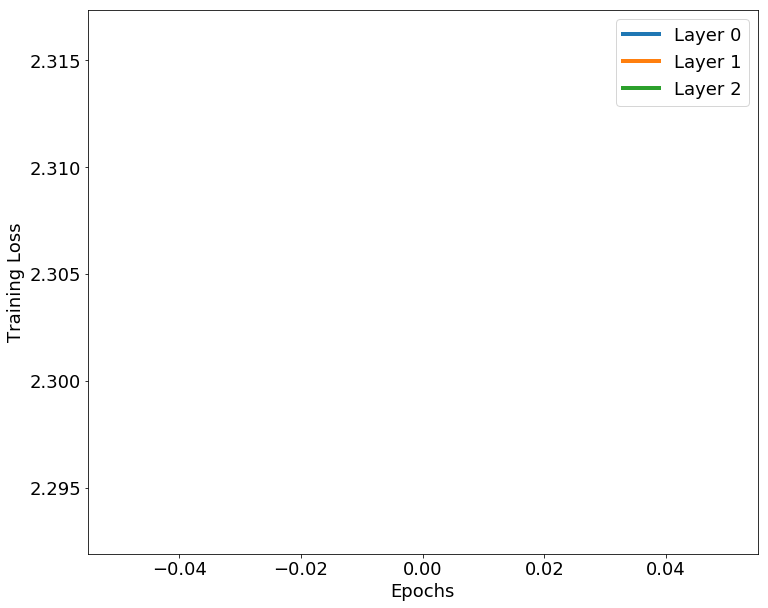

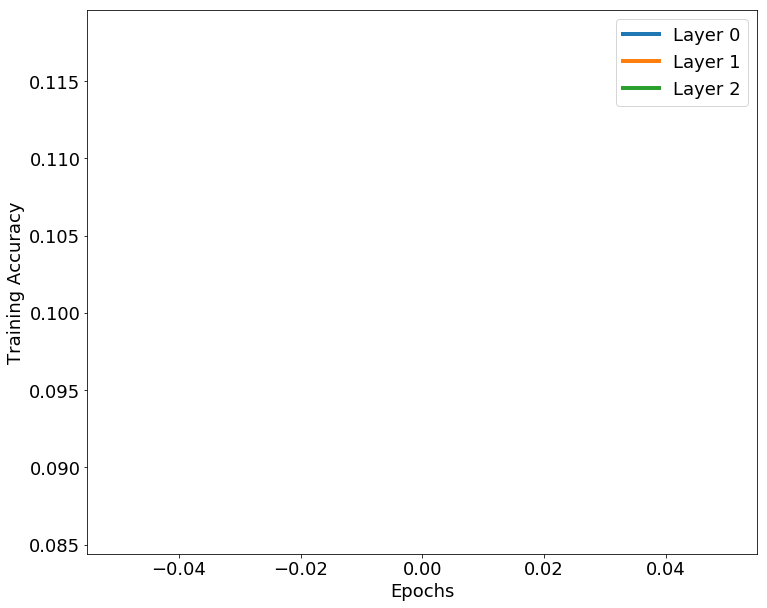

In [9]:
visualize.plot_layers(zip(*branch_loss), xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(zip(*branch_acc), xlabel='Epochs', ylabel='Training Accuracy')

Run test suite and visualize

In [10]:
#set network to inference mode
branchyNet.testing()
branchyNet.verbose = False
if cuda.available:
    branchyNet.to_gpu()
g_baseacc, g_basediff, _, _ = utils.test(branchyNet,x_test,y_test,main=True,batchsize=TEST_BATCHSIZE)
g_basediff = (g_basediff / float(len(y_test))) * 1000.

#branchyNet.to_cpu()
c_baseacc, c_basediff, _, _ = utils.test(branchyNet,x_test,y_test,main=True,batchsize=TEST_BATCHSIZE)
c_basediff = (c_basediff / float(len(y_test))) * 1000.

In [11]:
# Specify thresholds
thresholds = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.75, 1., 5., 10.]


In [ ]:
#GPU
if cuda.available:
    branchyNet.to_gpu()
g_ts, g_accs, g_diffs, g_exits = utils.screen_branchy(branchyNet, x_test, y_test, thresholds,
                                                    batchsize=TEST_BATCHSIZE, verbose=True)

#convert to ms
g_diffs *= 1000.

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])


('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])


('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing


('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])


('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])


('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])


('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])


('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])


('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 1])
we can go into testing
('test', [], 0)
('test', [])


('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we 

('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we 

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
('test', [])
('test', [0], 1)
('test', [0])
('test', [0, 0], 2)
('test', [0, 0])
we can go into testing
('test', [], 0)
(

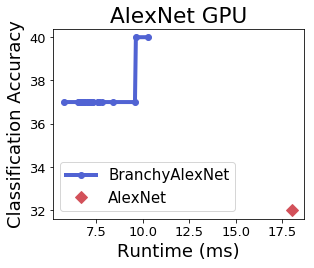

In [21]:
visualize.plot_line_tradeoff(g_accs, g_diffs, g_ts, g_exits, g_baseacc, g_basediff, all_samples=False, inc_amt=-0.0001000,
                             our_label='BranchyAlexNet', orig_label='AlexNet', xlabel='Runtime (ms)', 
                             title='AlexNet GPU', output_path='_figs/alexnet_gpu.pdf')

In [22]:
#CPU
branchyNet.to_cpu()
c_ts, c_accs, c_diffs, c_exits  = utils.screen_branchy(branchyNet, x_test, y_test, thresholds,
                                                     batchsize=TEST_BATCHSIZE, verbose=True)

#convert to ms
c_diffs *= 1000.

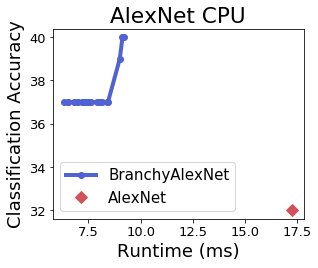

In [23]:
visualize.plot_line_tradeoff(c_accs, c_diffs, c_ts, c_exits, c_baseacc, c_basediff, all_samples=False, inc_amt=-0.0001000,
                             our_label='BranchyAlexNet', orig_label='AlexNet', xlabel='Runtime (ms)',
                             title='AlexNet CPU', output_path='_figs/alexnet_cpu.pdf')

In [24]:
reload(utils)
print 'CPU Results:'
utils.branchy_table_results('AlexNet', c_baseacc, c_basediff, c_accs, c_diffs, c_exits, c_ts)

print '\n\n'

print 'GPU Results:'
utils.branchy_table_results('AlexNet', g_baseacc, g_basediff, g_accs, c_diffs, g_exits, g_ts)

CPU Results:
        Network        Acc.(%)       Time(ms)           Gain      Thrshld.T        Exit(%)
        AlexNet          32.00          17.28              -              -              -
      B-AlexNet          31.00          17.52           0.99{0.0001, 0.0001}{0.0, 0.0, 100.0}
      B-AlexNet          31.00          18.47           0.94{0.0001, 0.001}{0.0, 0.0, 100.0}
      B-AlexNet          31.00          16.83           1.03{0.0001, 0.005}{0.0, 0.0, 100.0}
      B-AlexNet          31.00          16.19           1.07 {0.0001, 0.01}{0.0, 0.0, 100.0}
      B-AlexNet          31.00          20.33           0.85 {0.0001, 0.05}{0.0, 1.0, 99.0}
      B-AlexNet          31.00          17.55           0.98  {0.0001, 0.1}{0.0, 1.0, 99.0}
      B-AlexNet          32.00          17.63           0.98  {0.0001, 0.5}{0.0, 7.000000000000001, 93.0}
      B-AlexNet          34.00          16.31           1.06 {0.0001, 0.75}{0.0, 15.0, 85.0}
      B-AlexNet          35.00          17.45    

Save model/data

In [25]:
import dill
branchyNet.to_cpu()
with open("_models/alexnet_cifar10.bn", "wb") as f:
    dill.dump(branchyNet, f)
with open("_models/alexnet_cifar10_gpu_results.pkl", "wb") as f:
    dill.dump({'accs': g_accs, 'rt': g_diffs, 'exits': g_exits, 'ts': g_ts, 'baseacc': g_baseacc, 'basediff': g_basediff}, f)
with open("_models/alexnet_cifar10_cpu_results.pkl", "wb") as f:
    dill.dump({'accs': c_accs, 'rt': c_diffs, 'exits': c_exits, 'ts': c_ts, 'baseacc': c_baseacc, 'basediff': c_basediff}, f)

In [26]:
import dill
with open("_models/lenet_mnist_gpu_results.pkl", "rb") as f:
    gpu_res = dill.load(f)
with open("_models/lenet_mnist_cpu_results.pkl", "rb") as f:
    cpu_res = dill.load(f)